In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.5 MB/s eta 0:00:37
    --------------------------------------- 0.8/56.8 MB 1.5 MB/s eta 0:00:39
    --------------------------------------- 1.3/56.8 MB 1.5 MB/s eta 0:00:37
   - -------------------------------------- 1.6/56.8 MB 1.5 MB/s eta 0:00:37
   - -------------------------------------- 2.1/56.8 MB 1.7 MB/s eta 0:00:34
   - -------------------------------------- 2.6/56.8 MB 1.8 MB/s eta 0:00:31
   -- ------------------------------------- 3.1/56.8 MB 1.8 MB/s eta 0:00:30
   -- ------------------------------------- 3.7/56.8 MB 1.9 MB/s eta 0:00:29
   -- ------------------------------------- 3.9/56.8 MB 1.9 MB/s eta 0:00:28
   --- ------------------------------------ 4.5/56.8 MB 1.9 MB/s eta 0:00:27
   --- -------------

In [3]:
!pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 1.4 MB/s eta 0:00:00



TOP 3 FEATURES ANALYSIS

Top 3 Most Important Features:
5. num__cibil_score: 0.7528
11. num__loan_to_income_ratio: 0.1042
4. num__loan_term: 0.0959


<Figure size 1000x600 with 0 Axes>

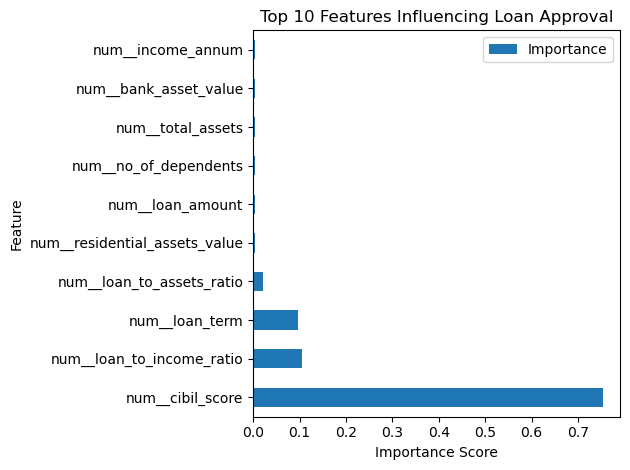

In [9]:
# After hyperparameter tuning section
print("\n" + "="*50)
print("TOP 3 FEATURES ANALYSIS")
print("="*50)

# Get feature importance from the model
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
importances = best_model.named_steps['clf'].feature_importances_

# Create importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Display top 3
print("\nTop 3 Most Important Features:")
for i, row in importance_df.head(3).iterrows():
    print(f"{i+1}. {row['Feature']}: {row['Importance']:.4f}")

# Save for report
top_3_features = importance_df.head(3)
top_3_features.to_csv('top_3_features.csv', index=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
importance_df.head(10).plot(x='Feature', y='Importance', kind='barh')
plt.xlabel('Importance Score')
plt.title('Top 10 Features Influencing Loan Approval')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    obj

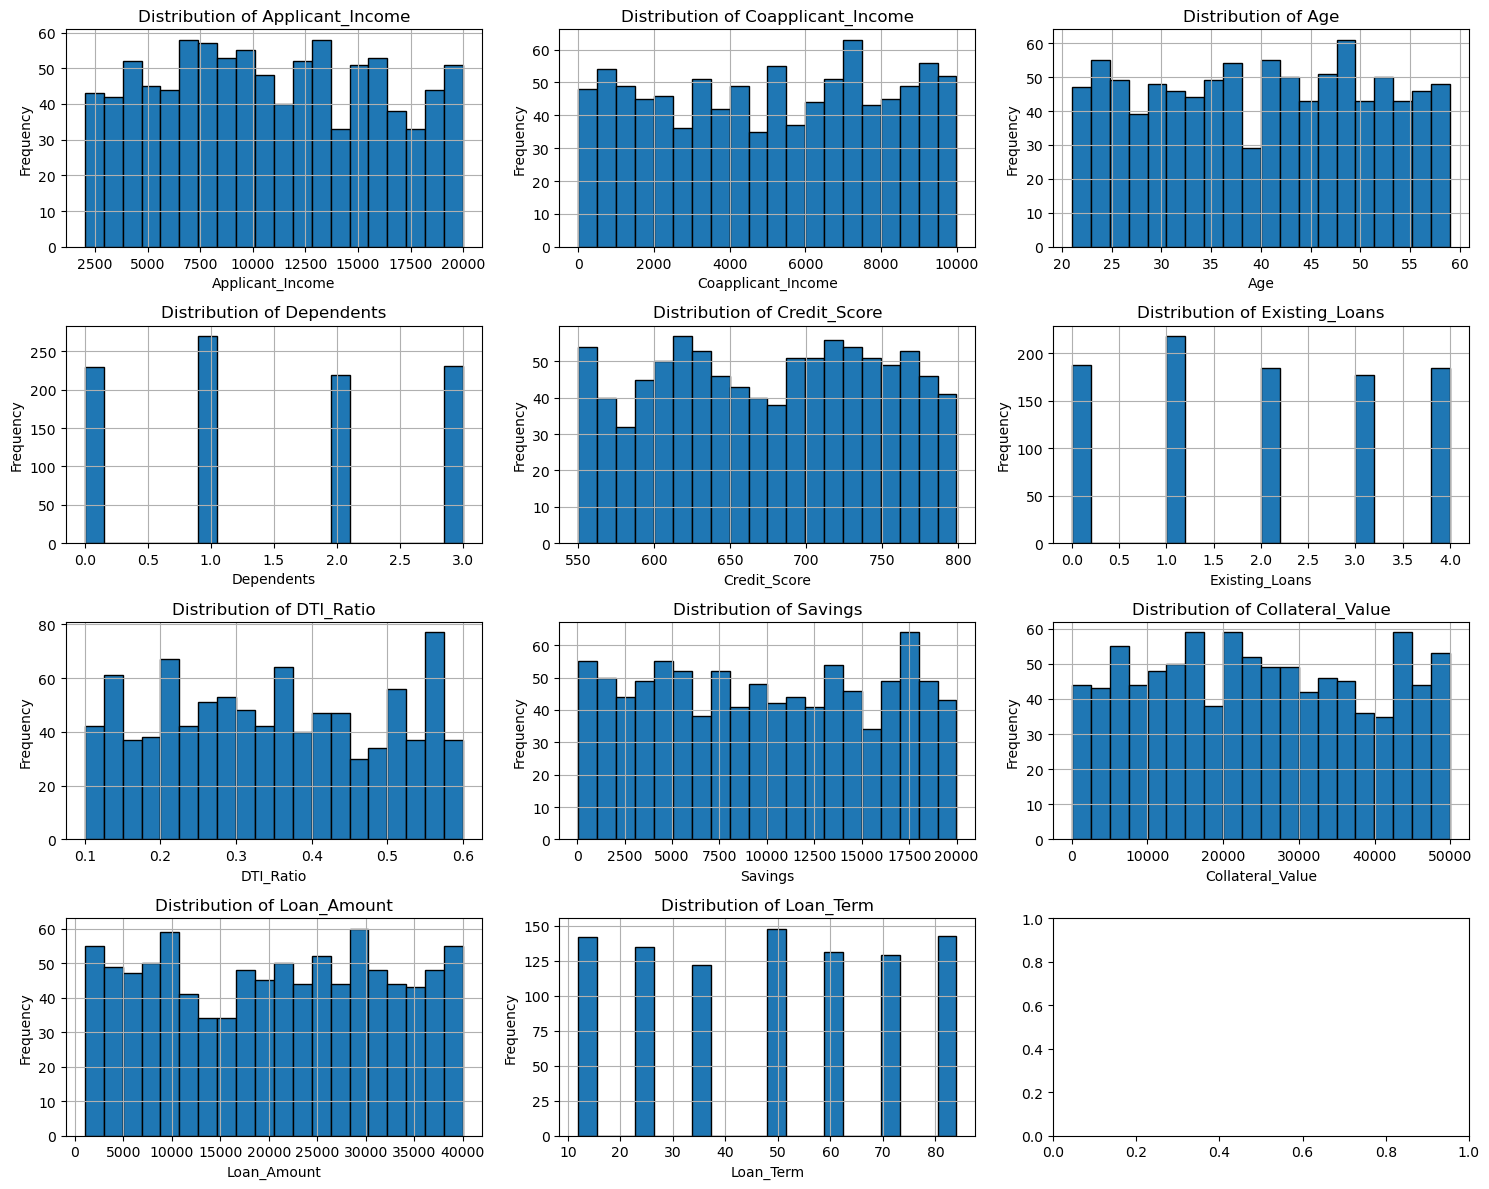


Categorical Features: ['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved']


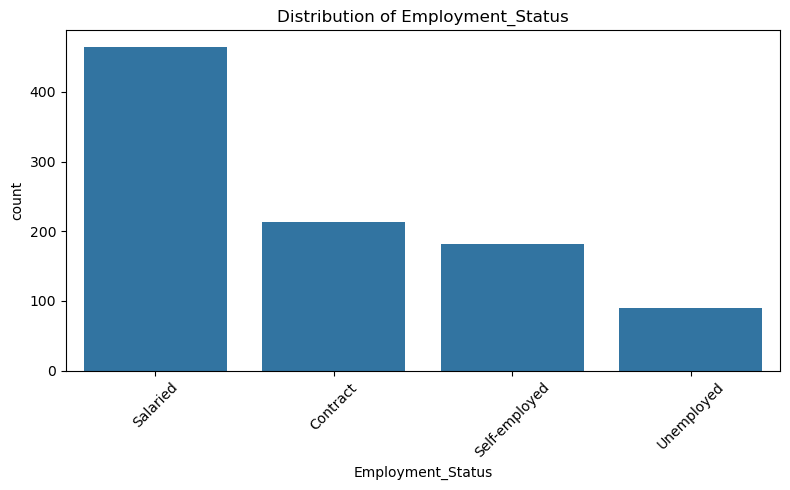

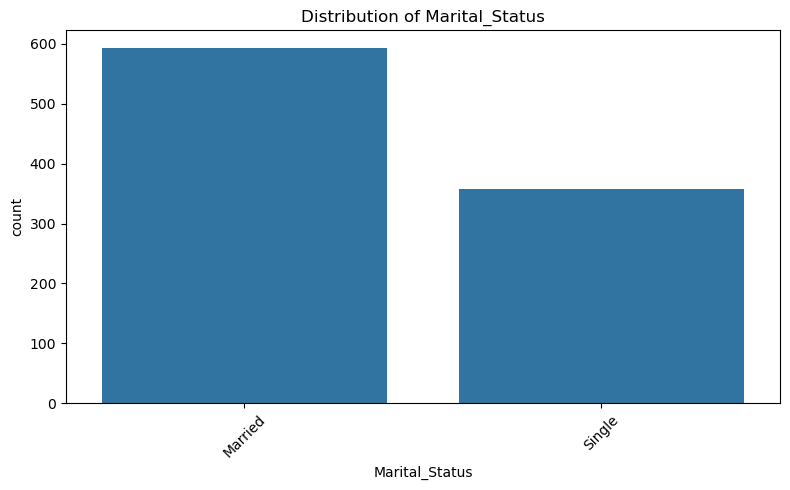

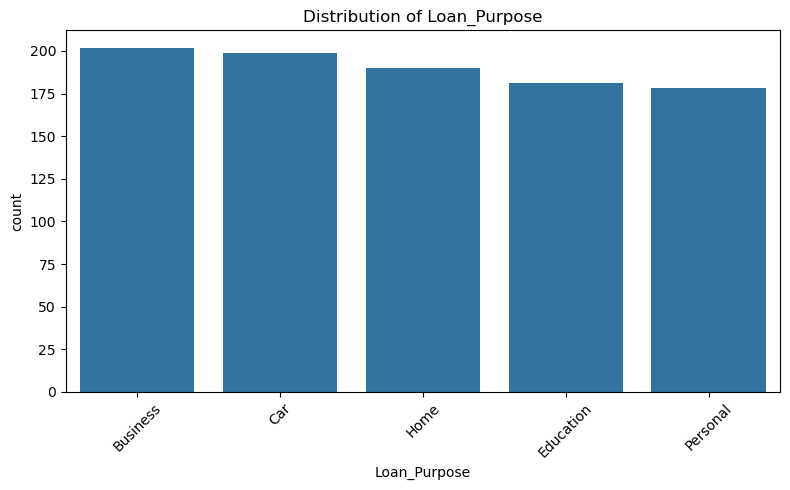

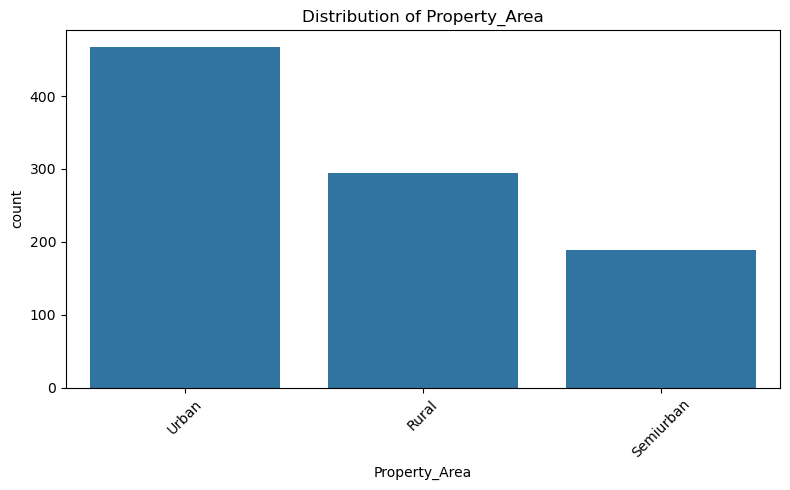

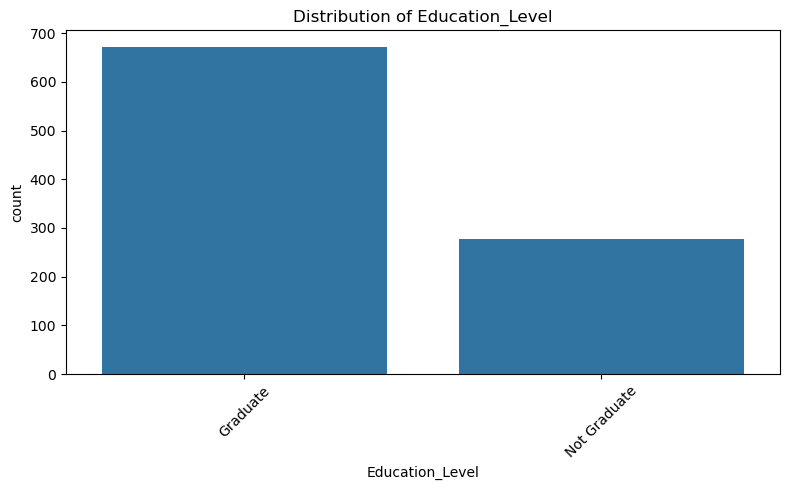

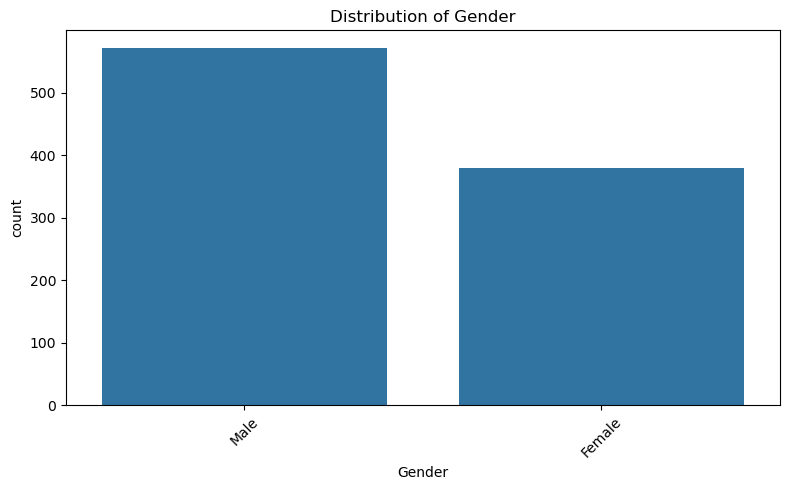

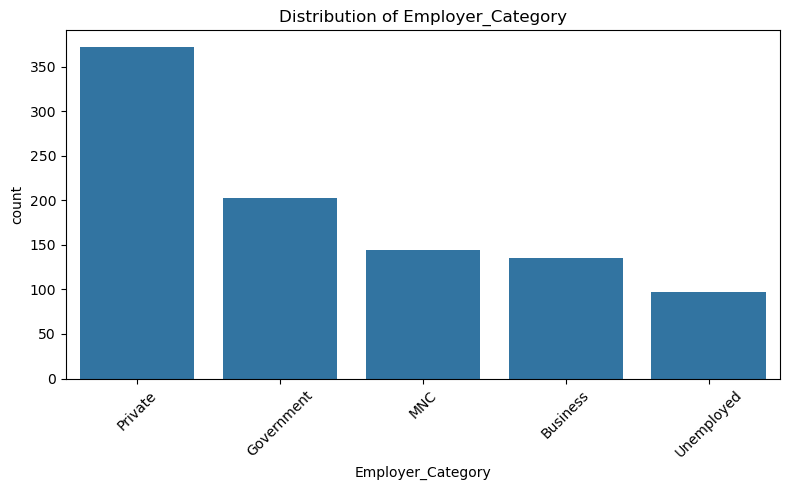

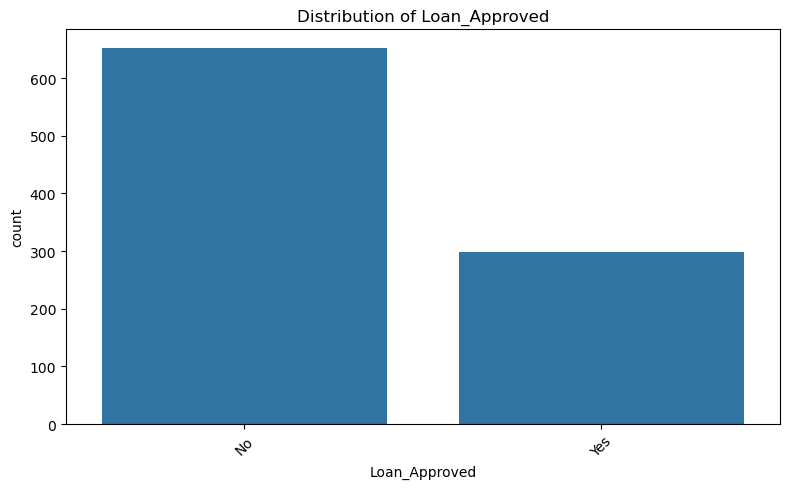

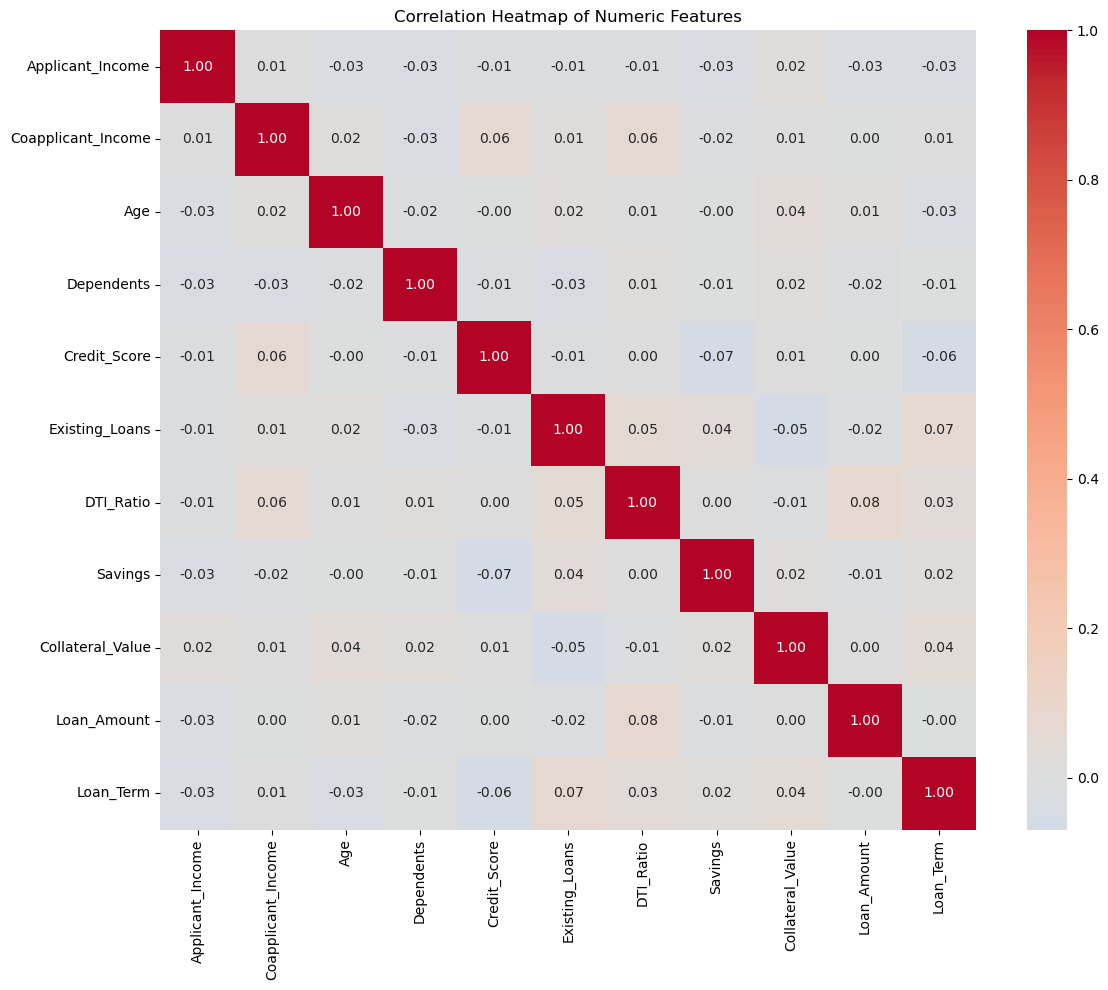

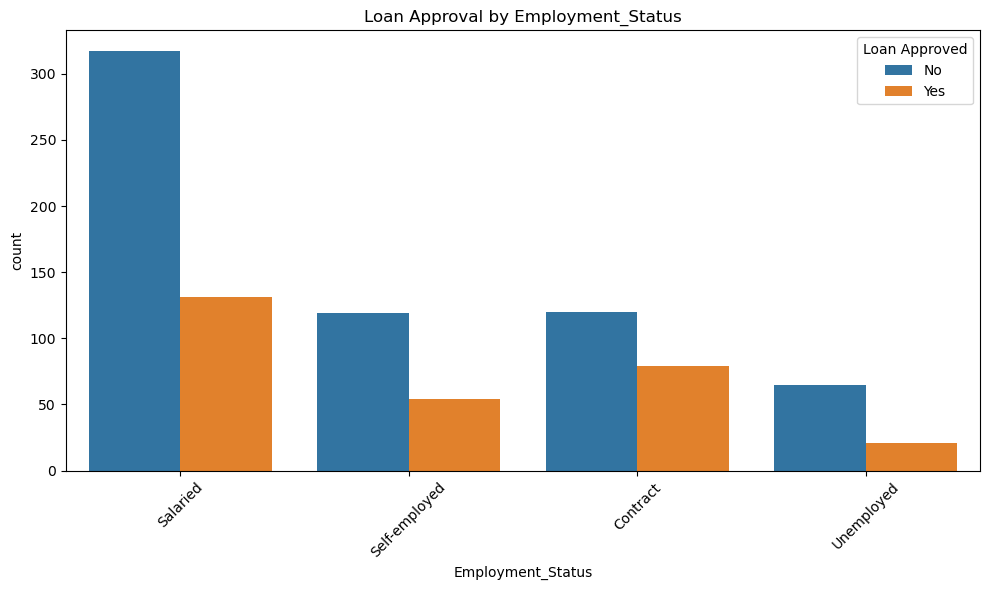

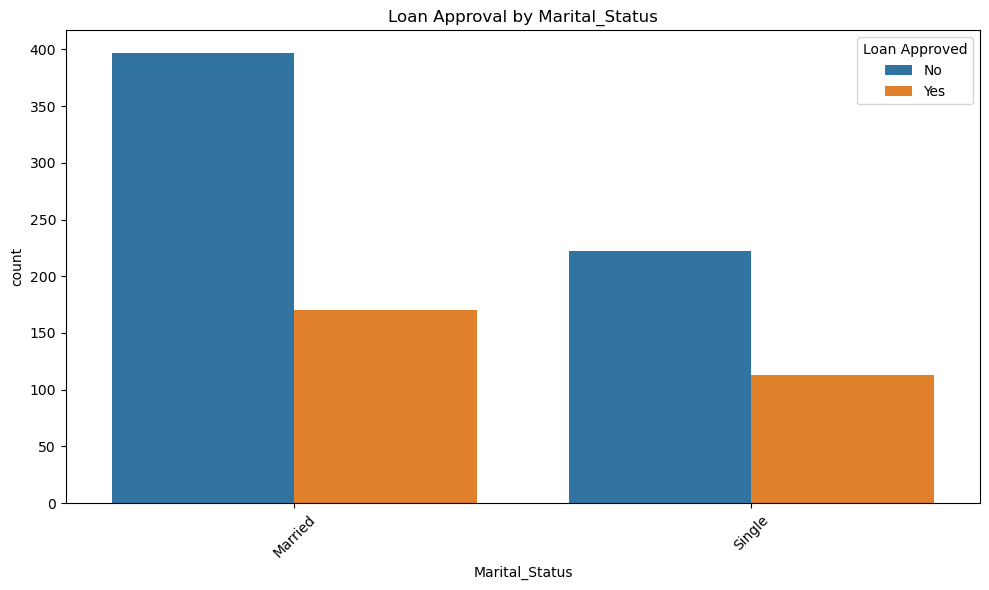

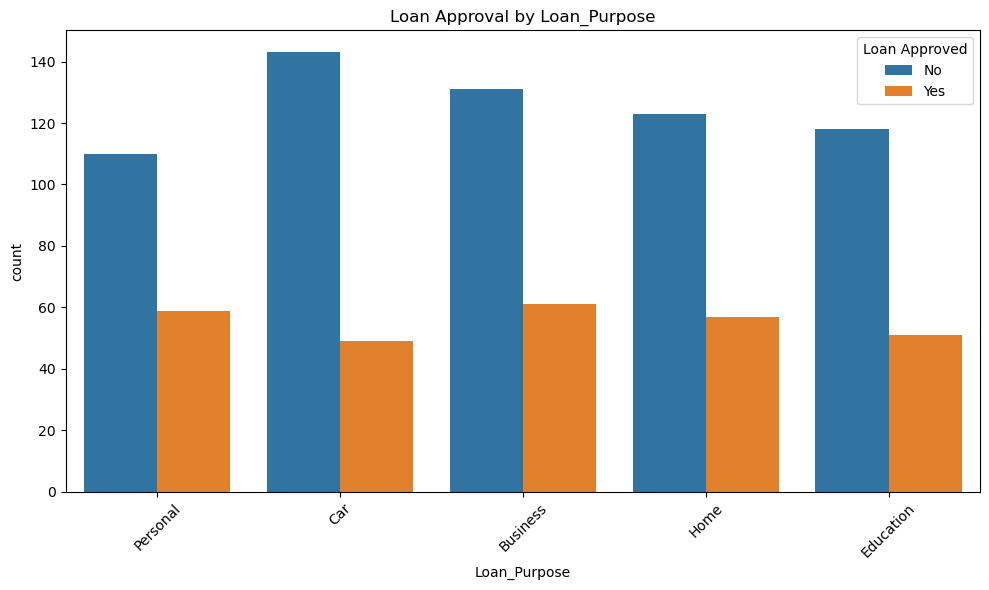

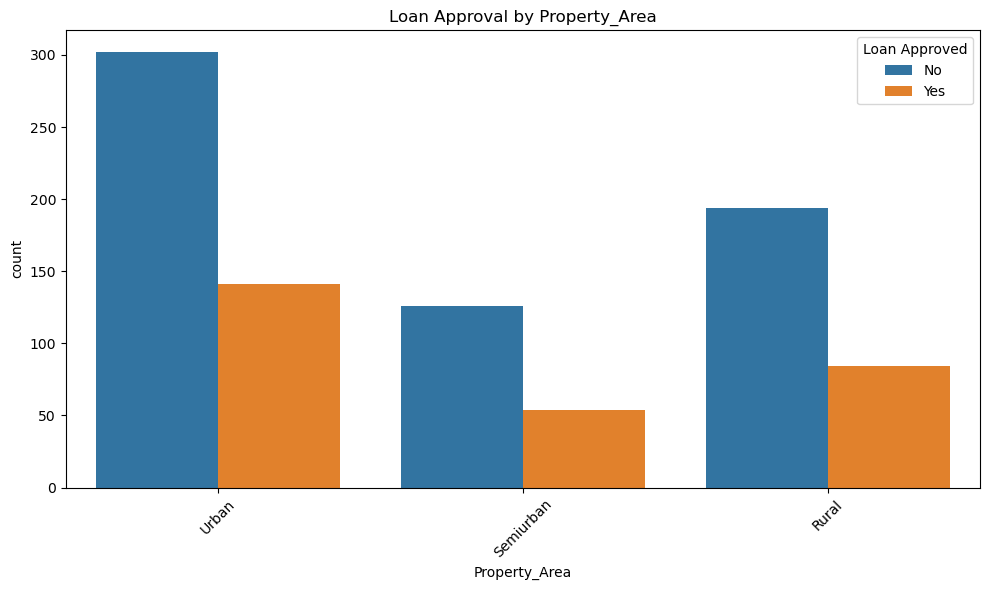

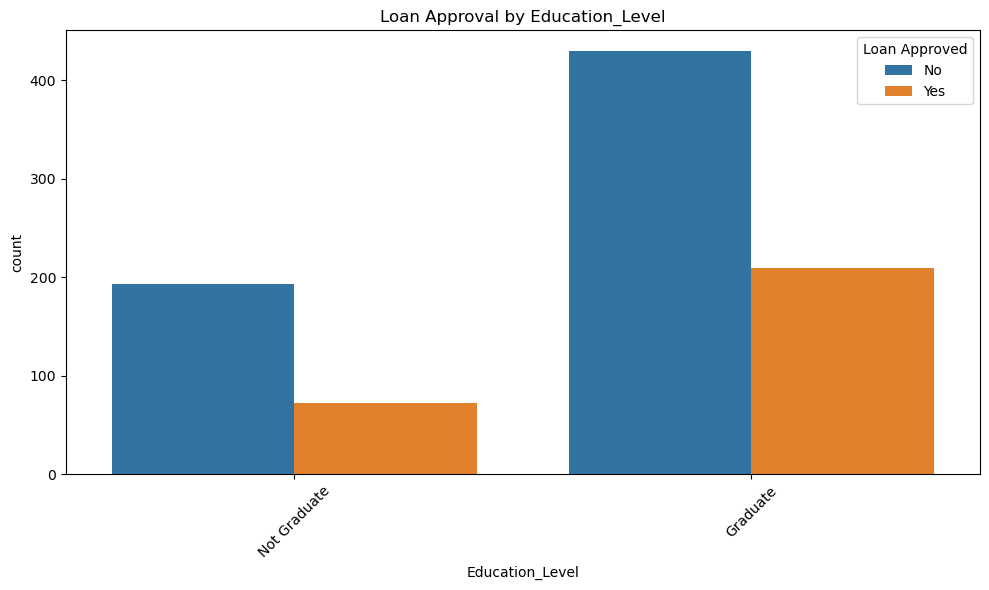

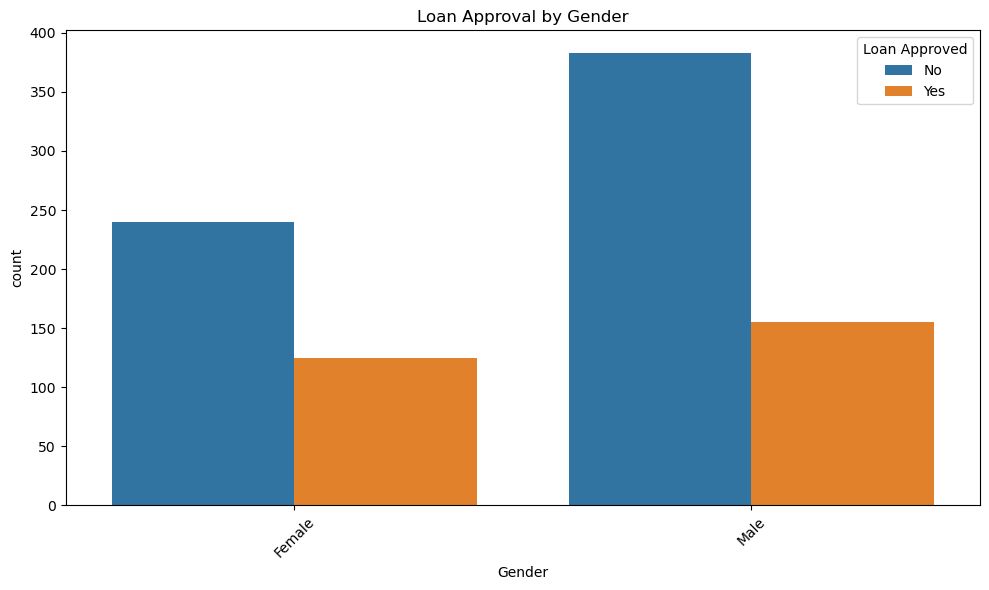

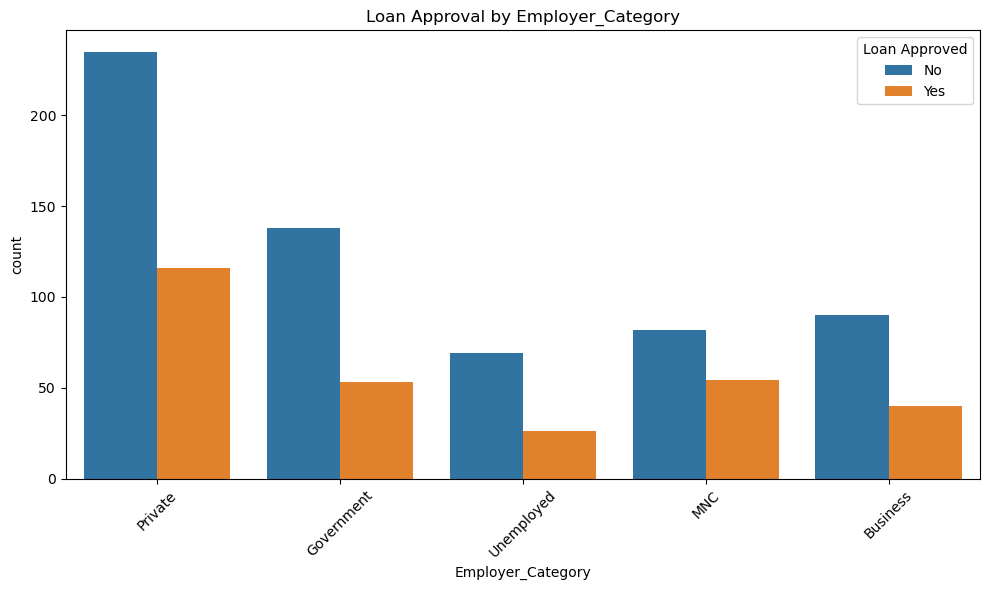

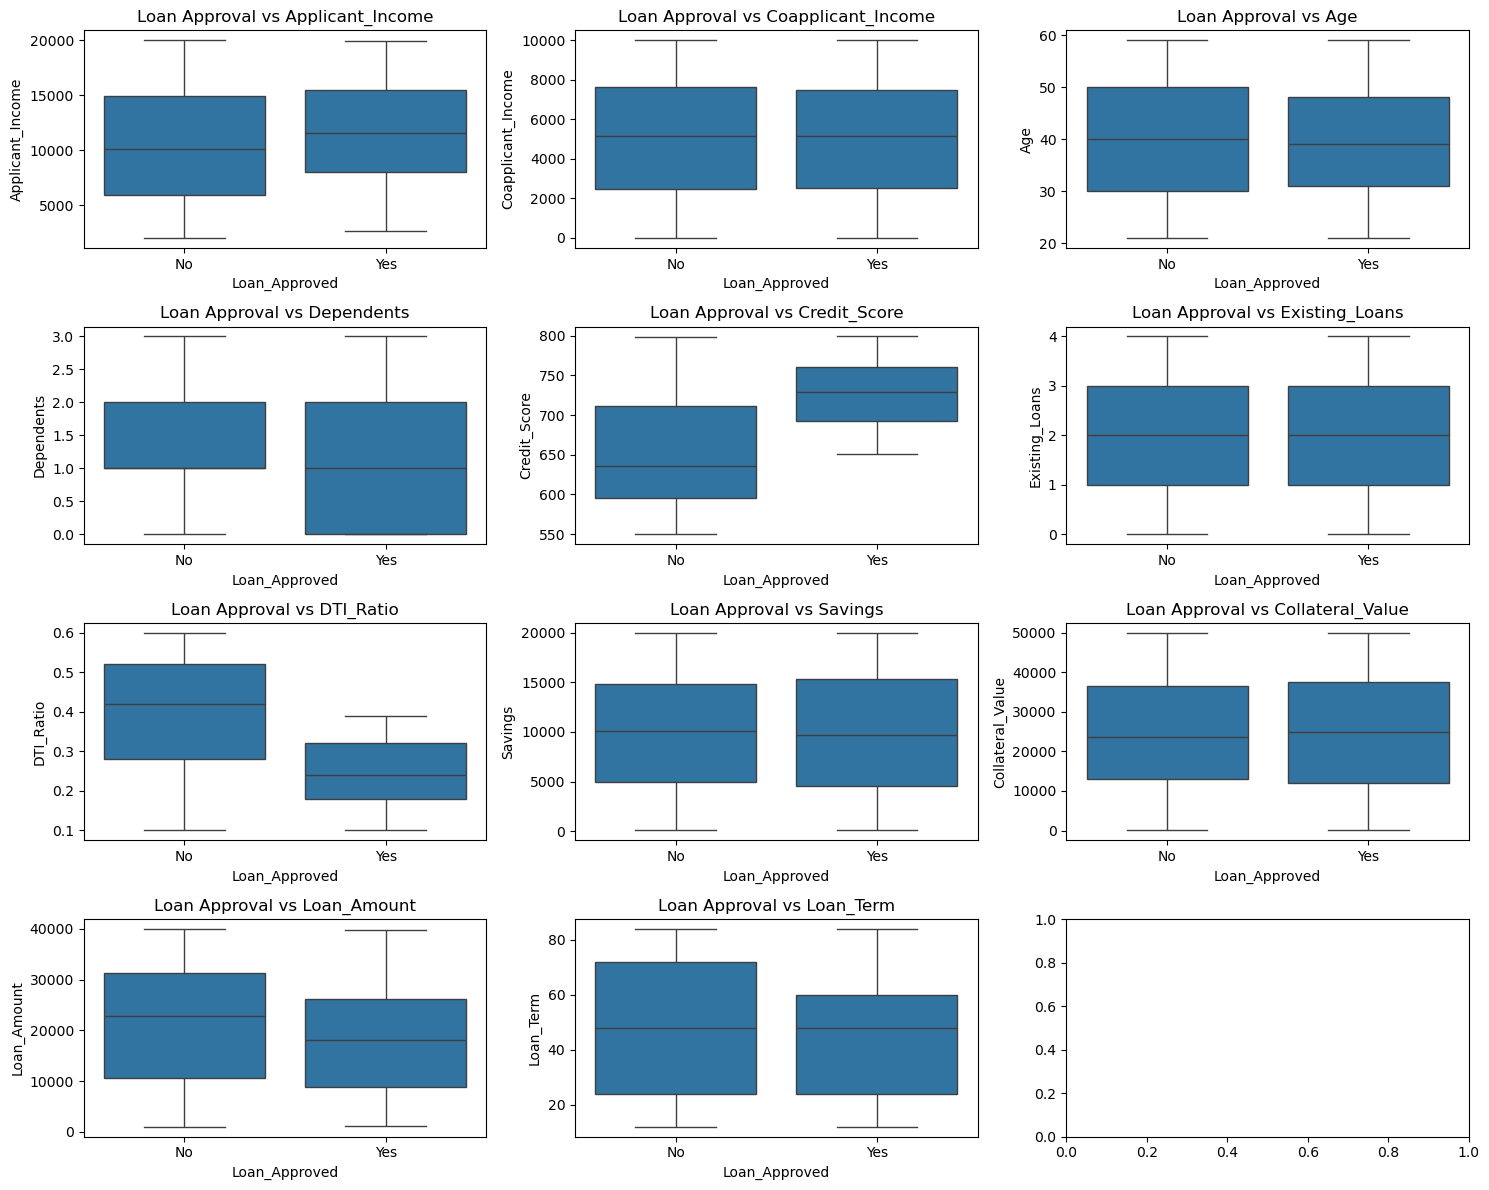


FEATURE ENGINEERING
New features created:
- Total_Income
- Income_to_Loan_Ratio
- Collateral_to_Loan_Ratio
- Savings_to_Loan_Ratio

Final numeric features (15): ['Applicant_Income', 'Coapplicant_Income', 'Age', 'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings', 'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Total_Income', 'Income_to_Loan_Ratio', 'Collateral_to_Loan_Ratio', 'Savings_to_Loan_Ratio']
Final categorical features (7): ['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender', 'Employer_Category']

DATA PREPARATION

Unique values in Loan_Approved: ['No' 'Yes' nan]
Value counts:
Loan_Approved
No     652
Yes    298
Name: count, dtype: int64

Unmapped values: [nan]
Proceeding with 950 valid samples
Training set: 760 samples
Test set: 190 samples
Class distribution in train: {0.0: 0.6868421052631579, 1.0: 0.3131578947368421}

MODEL TRAINING - BASELINE

Baseline Model Classification Report:


C:\Users\mmahi\anaconda3\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:52:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

    Rejected       0.98      0.96      0.97       130
    Approved       0.92      0.97      0.94        60

    accuracy                           0.96       190
   macro avg       0.95      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

Baseline ROC AUC: 0.9837


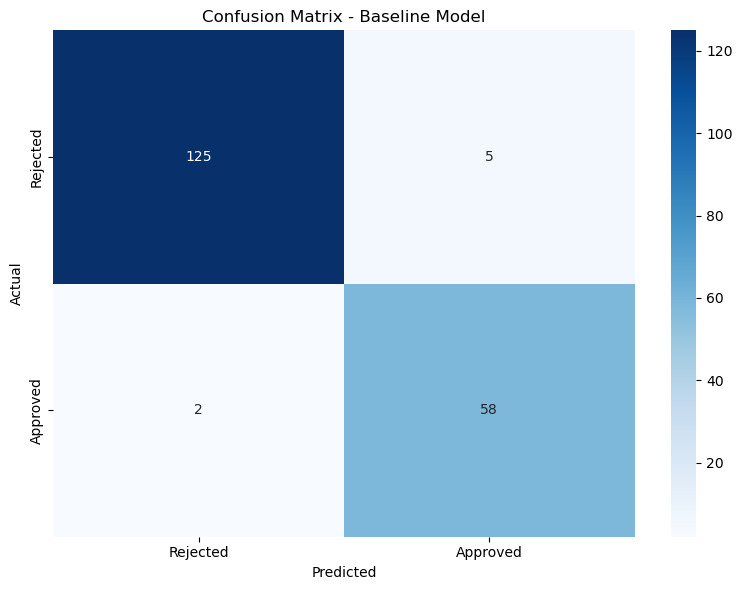


HYPERPARAMETER TUNING

Starting hyperparameter search...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\mmahi\anaconda3\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:52:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters: {'clf__subsample': 1.0, 'clf__n_estimators': 200, 'clf__max_depth': 5, 'clf__learning_rate': 0.1, 'clf__colsample_bytree': 1.0}
Best Cross-Validation Score: 0.9911

FINAL MODEL PERFORMANCE

Best Model Classification Report:
              precision    recall  f1-score   support

    Rejected       0.98      0.95      0.97       130
    Approved       0.91      0.97      0.94        60

    accuracy                           0.96       190
   macro avg       0.95      0.96      0.95       190
weighted avg       0.96      0.96      0.96       190

Best Model ROC AUC: 0.9853
Best Model Accuracy: 0.9579


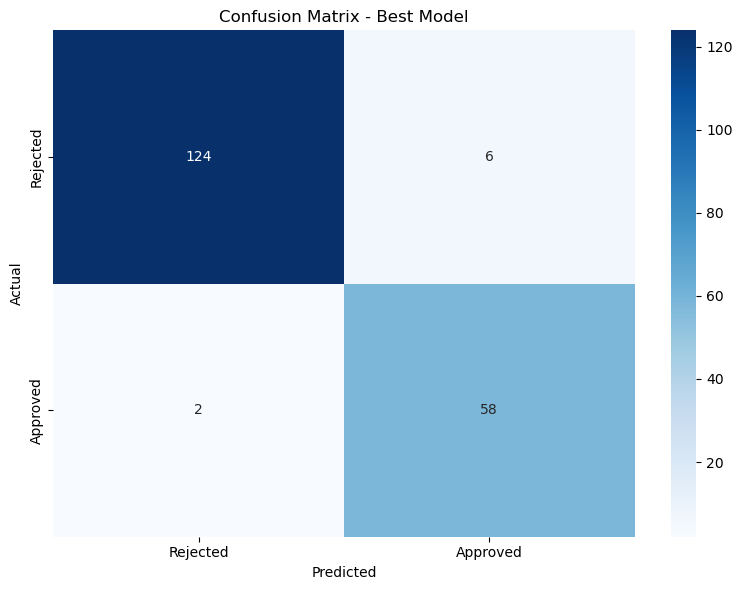

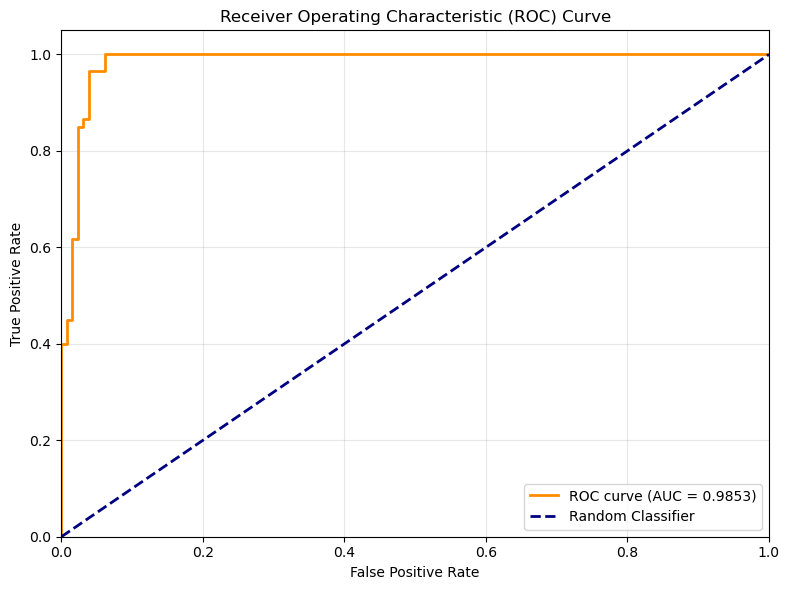


FEATURE IMPORTANCE ANALYSIS

Calculating permutation importance...

Top 10 Features by Permutation Importance:
Credit_Score            0.282359
DTI_Ratio               0.201538
Applicant_Income        0.017718
Income_to_Loan_Ratio    0.006128
Loan_Amount             0.001590
Savings                 0.001513
Education_Level         0.000833
Marital_Status          0.000269
Existing_Loans          0.000128
Loan_Purpose           -0.000051
dtype: float64

TOP 3 FEATURES INFLUENCING LOAN APPROVAL
1. Credit_Score: 0.2824
2. DTI_Ratio: 0.2015
3. Applicant_Income: 0.0177

Top 3 features saved to 'top_3_features.csv'


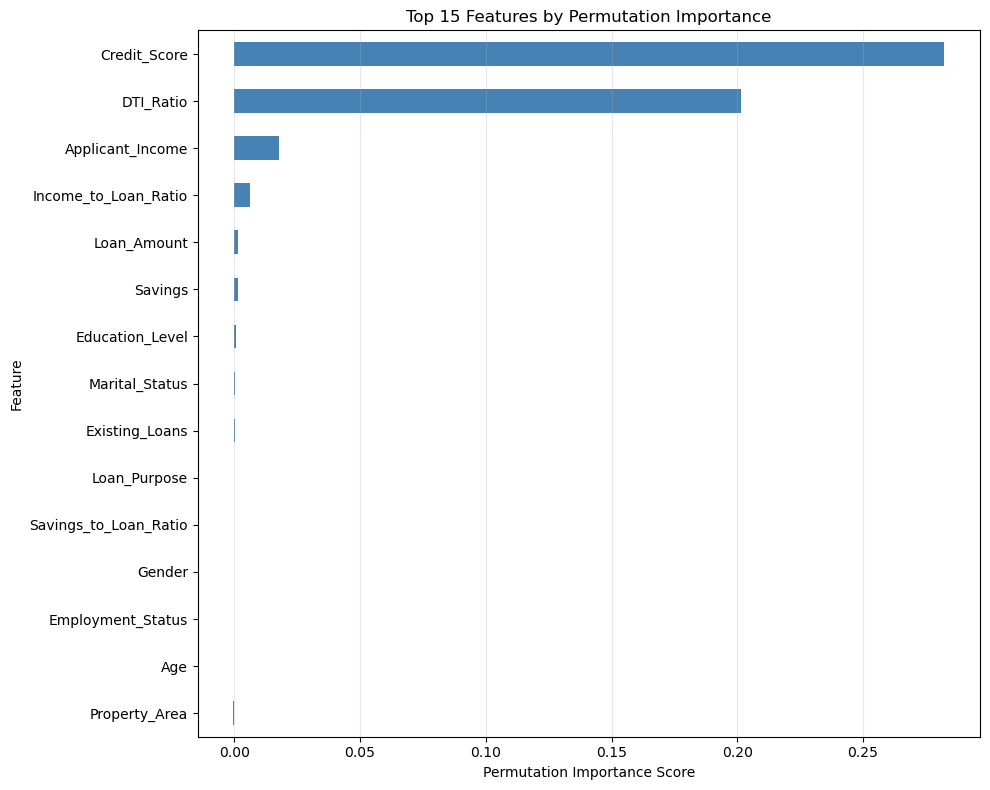


Top 10 Features by XGBoost Built-in Importance:
                       Feature  Importance
6               num__DTI_Ratio    0.329134
4            num__Credit_Score    0.231460
0        num__Applicant_Income    0.066360
12   num__Income_to_Loan_Ratio    0.061729
9             num__Loan_Amount    0.033533
28  cat__Employer_Category_MNC    0.030782
11           num__Total_Income    0.024263
21      cat__Loan_Purpose_Home    0.022724
2                     num__Age    0.020085
14  num__Savings_to_Loan_Ratio    0.016727


<Figure size 1000x800 with 0 Axes>

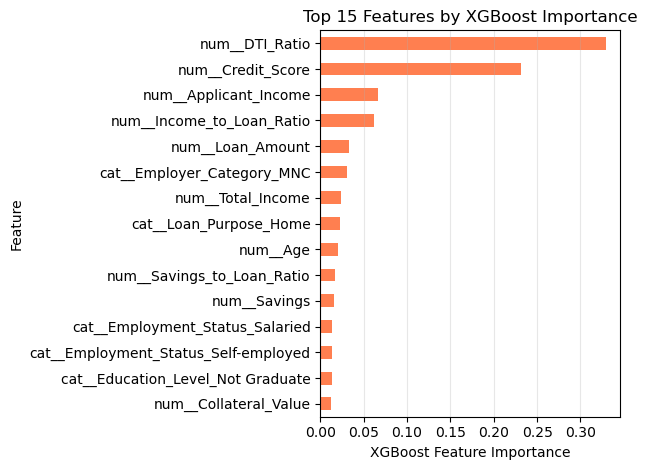


SHAP ANALYSIS
Calculating SHAP values...


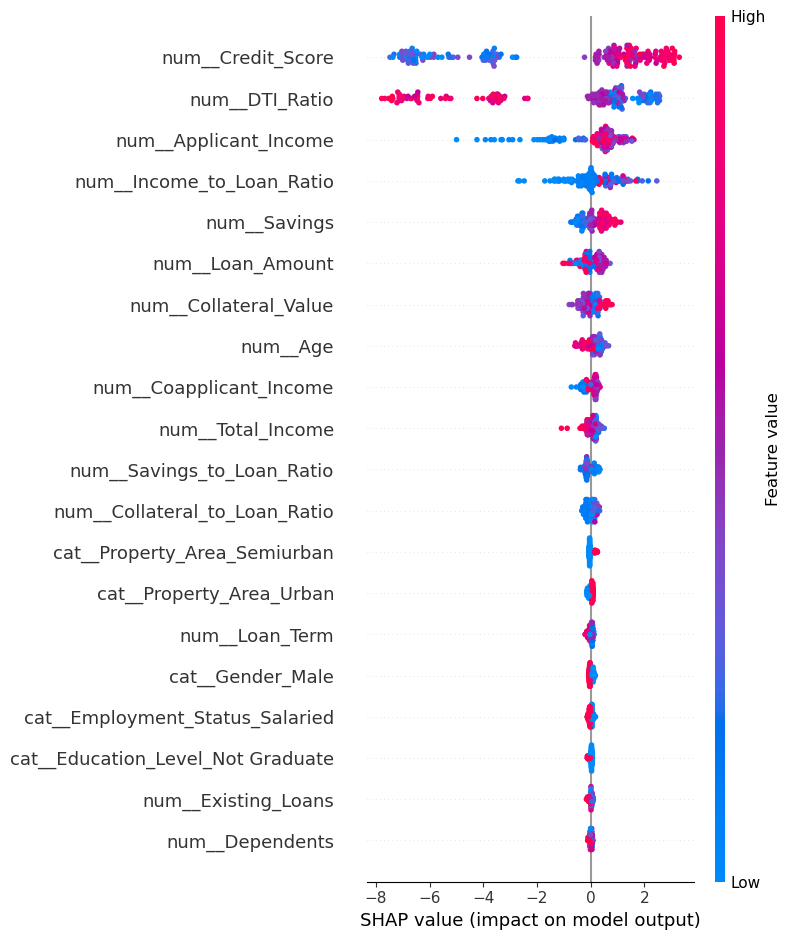


SAVING RESULTS
✓ Model saved as: loan_approval_pipeline.joblib
✓ Classification report saved as: classification_report.txt
✓ Model metrics saved as: model_metrics.csv

PROJECT COMPLETE!

All outputs have been saved:
  - Model: loan_approval_pipeline.joblib
  - Metrics: classification_report.txt, model_metrics.csv
  - Top Features: top_3_features.csv
  - Visualizations: Multiple PNG files


In [3]:
# Loan Approval Prediction Project - Complete Notebook with EDA

# ------------------------------
# 1. Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier
import shap
import joblib

# ------------------------------
# 2. Load Dataset
# ------------------------------
df = pd.read_csv(r"C:\Users\mmahi\Downloads\Loan-Approval-Prediction\data\loan_approval.csv")

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Quick overview
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(df.info())
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
print(df.describe(include='all').T)
print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)
print(df.isna().mean().sort_values(ascending=False))

# Check target variable
print("\n" + "="*60)
print("TARGET VARIABLE DISTRIBUTION")
print("="*60)
print(df['Loan_Approved'].value_counts())
print(df['Loan_Approved'].value_counts(normalize=True))

# ------------------------------
# 3. Exploratory Data Analysis (EDA)
# ------------------------------
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Distribution of numeric features
num_feats = df.select_dtypes(include=['int64','float64']).columns.tolist()
# Remove ID from numeric features
if 'Applicant_ID' in num_feats:
    num_feats.remove('Applicant_ID')

# Plot numeric distributions
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()
for idx, col in enumerate(num_feats):
    df[col].hist(bins=20, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribution of categorical features
cat_feats = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Features: {cat_feats}")

for col in cat_feats:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'dist_{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(12,10))
correlation_matrix = df[num_feats].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Target vs categorical features
for col in cat_feats:
    if col != 'Loan_Approved':
        plt.figure(figsize=(10,6))
        sns.countplot(x=col, hue='Loan_Approved', data=df)
        plt.title(f'Loan Approval by {col}')
        plt.xticks(rotation=45)
        plt.legend(title='Loan Approved')
        plt.tight_layout()
        plt.savefig(f'target_vs_{col}.png', dpi=300, bbox_inches='tight')
        plt.show()

# Target vs numeric features (box plots)
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()
for idx, col in enumerate(num_feats):
    sns.boxplot(x='Loan_Approved', y=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'Loan Approval vs {col}')
plt.tight_layout()
plt.savefig('boxplots_target_vs_features.png', dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------
# 4. Feature Engineering
# ------------------------------
print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# Create new features
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']
df['Income_to_Loan_Ratio'] = df['Total_Income'] / (df['Loan_Amount'] + 1)
df['Collateral_to_Loan_Ratio'] = df['Collateral_Value'] / (df['Loan_Amount'] + 1)
df['Savings_to_Loan_Ratio'] = df['Savings'] / (df['Loan_Amount'] + 1)

print("New features created:")
print("- Total_Income")
print("- Income_to_Loan_Ratio")
print("- Collateral_to_Loan_Ratio")
print("- Savings_to_Loan_Ratio")

# Update feature lists
num_feats = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_feats = df.select_dtypes(include=['object']).columns.tolist()

# Remove target and ID from features
if 'Loan_Approved' in cat_feats:
    cat_feats.remove('Loan_Approved')
if 'Applicant_ID' in num_feats:
    num_feats.remove('Applicant_ID')

print(f"\nFinal numeric features ({len(num_feats)}): {num_feats}")
print(f"Final categorical features ({len(cat_feats)}): {cat_feats}")

# ------------------------------
# 5. Preprocessing Pipelines
# ------------------------------
num_transform = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transform = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
preprocessor = ColumnTransformer([
    ('num', num_transform, num_feats),
    ('cat', cat_transform, cat_feats)
])

# ------------------------------
# 6. Model Pipeline
# ------------------------------
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# ------------------------------
# 7. Train/Test Split
# ------------------------------
print("\n" + "="*60)
print("DATA PREPARATION")
print("="*60)

target = 'Loan_Approved'

# Check unique values in target
print(f"\nUnique values in {target}:", df[target].unique())
print(f"Value counts:\n{df[target].value_counts()}")

# Strip spaces from target
df[target] = df[target].str.strip()

# Map to binary (Yes=1, No=0)
y = df[target].map({'Yes': 1, 'No': 0})

# Check for NaN values after mapping
if y.isna().any():
    print(f"\nWarning: Found {y.isna().sum()} NaN values after mapping")
    print("Unmapped values:", df[target][y.isna()].unique())
    # Drop rows with NaN in target
    valid_idx = ~y.isna()
    y = y[valid_idx]
    X = df[valid_idx].drop(columns=[target, 'Applicant_ID'], errors='ignore')
    print(f"Proceeding with {len(y)} valid samples")
else:
    X = df.drop(columns=[target, 'Applicant_ID'], errors='ignore')
    print(f"\nTotal samples: {len(y)}")
    print(f"Features: {X.shape[1]}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Class distribution in train: {y_train.value_counts(normalize=True).to_dict()}")

# ------------------------------
# 8. Train Model
# ------------------------------
print("\n" + "="*60)
print("MODEL TRAINING - BASELINE")
print("="*60)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print('\nBaseline Model Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))
print(f'Baseline ROC AUC: {roc_auc_score(y_test, y_proba):.4f}')

# Confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Baseline Model')
plt.tight_layout()
plt.savefig('confusion_matrix_baseline.png', dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------
# 9. Hyperparameter Tuning
# ------------------------------
print("\n" + "="*60)
print("HYPERPARAMETER TUNING")
print("="*60)

param_dist = {
    'clf__n_estimators': [100, 200, 400],
    'clf__max_depth': [3, 5, 7, 9],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
}

search = RandomizedSearchCV(
    model, param_dist, n_iter=30, scoring='roc_auc', 
    cv=5, n_jobs=-1, random_state=42, verbose=1
)

print("\nStarting hyperparameter search...")
search.fit(X_train, y_train)
best_model = search.best_estimator_

print('\nBest Parameters:', search.best_params_)
print(f'Best Cross-Validation Score: {search.best_score_:.4f}')

# Re-evaluate with best model
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:,1]

print("\n" + "="*60)
print("FINAL MODEL PERFORMANCE")
print("="*60)
print('\nBest Model Classification Report:')
print(classification_report(y_test, y_pred_best, target_names=['Rejected', 'Approved']))
print(f'Best Model ROC AUC: {roc_auc_score(y_test, y_proba_best):.4f}')
print(f'Best Model Accuracy: {(y_pred_best == y_test).mean():.4f}')

# Final confusion matrix
plt.figure(figsize=(8,6))
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Model')
plt.tight_layout()
plt.savefig('confusion_matrix_final.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------
# 10. Feature Importance Analysis
# ------------------------------
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Permutation importance
print("\nCalculating permutation importance...")
r = permutation_importance(
    best_model, X_test, y_test, 
    n_repeats=10, random_state=42, scoring='roc_auc'
)
imp = pd.Series(r.importances_mean, index=X_test.columns).sort_values(ascending=False)

print('\nTop 10 Features by Permutation Importance:')
print(imp.head(10))

# Extract top 3 features
top3_features = imp.head(3)
print("\n" + "="*60)
print("TOP 3 FEATURES INFLUENCING LOAN APPROVAL")
print("="*60)
for i, (feature, importance) in enumerate(top3_features.items(), 1):
    print(f"{i}. {feature}: {importance:.4f}")

# Save top 3 features
top3_df = pd.DataFrame({
    'Rank': [1, 2, 3],
    'Feature': top3_features.index,
    'Importance Score': top3_features.values
})
top3_df.to_csv('top_3_features.csv', index=False)
print("\nTop 3 features saved to 'top_3_features.csv'")

# Plot feature importance
plt.figure(figsize=(10, 8))
imp.head(15).sort_values().plot(kind='barh', color='steelblue')
plt.xlabel('Permutation Importance Score')
plt.ylabel('Feature')
plt.title('Top 15 Features by Permutation Importance')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# XGBoost built-in feature importance
feature_names_transformed = best_model.named_steps['preprocessor'].get_feature_names_out()
xgb_importances = best_model.named_steps['clf'].feature_importances_

xgb_imp_df = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Importance': xgb_importances
}).sort_values('Importance', ascending=False)

print("\nTop 10 Features by XGBoost Built-in Importance:")
print(xgb_imp_df.head(10))

plt.figure(figsize=(10, 8))
xgb_imp_df.head(15).sort_values('Importance').plot(
    x='Feature', y='Importance', kind='barh', legend=False, color='coral'
)
plt.xlabel('XGBoost Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Features by XGBoost Importance')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('xgboost_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------
# 11. SHAP Analysis
# ------------------------------
print("\n" + "="*60)
print("SHAP ANALYSIS")
print("="*60)

print("Calculating SHAP values...")
X_test_trans = best_model.named_steps['preprocessor'].transform(X_test)
explainer = shap.TreeExplainer(best_model.named_steps['clf'])
shap_values = explainer.shap_values(X_test_trans)

# SHAP summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_trans, feature_names=feature_names_transformed, show=False)
plt.tight_layout()
plt.savefig('shap_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------
# 12. Save Model and Results
# ------------------------------
print("\n" + "="*60)
print("SAVING RESULTS")
print("="*60)

# Save model
joblib.dump(best_model, 'loan_approval_pipeline.joblib')
print('✓ Model saved as: loan_approval_pipeline.joblib')

# Save classification report
with open('classification_report.txt', 'w') as f:
    f.write("LOAN APPROVAL PREDICTION - FINAL MODEL PERFORMANCE\n")
    f.write("="*60 + "\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred_best, target_names=['Rejected', 'Approved']))
    f.write(f"\n\nROC AUC Score: {roc_auc_score(y_test, y_proba_best):.6f}\n")
    f.write(f"Accuracy: {(y_pred_best == y_test).mean():.6f}\n")
    f.write(f"\nBest Hyperparameters:\n")
    for param, value in search.best_params_.items():
        f.write(f"  {param}: {value}\n")
    f.write(f"\n\nTop 3 Features:\n")
    for i, (feature, importance) in enumerate(top3_features.items(), 1):
        f.write(f"  {i}. {feature}: {importance:.4f}\n")

print('✓ Classification report saved as: classification_report.txt')

# Save model metrics summary
metrics_summary = {
    'Accuracy': (y_pred_best == y_test).mean(),
    'ROC_AUC': roc_auc_score(y_test, y_proba_best),
    'True_Negatives': cm_best[0, 0],
    'False_Positives': cm_best[0, 1],
    'False_Negatives': cm_best[1, 0],
    'True_Positives': cm_best[1, 1],
}

pd.DataFrame([metrics_summary]).to_csv('model_metrics.csv', index=False)
print('✓ Model metrics saved as: model_metrics.csv')

print("\n" + "="*60)
print("PROJECT COMPLETE!")
print("="*60)
print("\nAll outputs have been saved:")
print("  - Model: loan_approval_pipeline.joblib")
print("  - Metrics: classification_report.txt, model_metrics.csv")
print("  - Top Features: top_3_features.csv")
print("  - Visualizations: Multiple PNG files")

In [1]:
import os
print("Current directory:", os.getcwd())
print("\nFiles in current directory:")
for file in os.listdir():
    if file.endswith('.joblib'):
        print(f"Found model file: {file}")

Current directory: C:\Users\mmahi

Files in current directory:
Found model file: loan_approval_pipeline.joblib
